# Analysis of Congress Bills

# Abstract
The objective of the project is to look at the data of all bills introduced in United States Congress (both House of Representatives and the Senate) since 1973. I will be analyzing how many bills are introduced and what happens to these bills, as in whether they are passed into becoming a law or rejected in some stage before that. The project also aims to tackle whether the recent news about gridlock in congress is true and whether this has led to a lower amount of bills being successfully passed as law over this time period. Similarly, I would also look at the composition of the congress and the cosponsors of the bills to see if that affects them. Finally I would see if a bill being bipartisan has a higher chance of passing and whether we see changes in bipartisan support in the US congress.

Through this Project I intend to give a mathematical idea to someone about what is the chance of bill they are interested in passing and getting enacted.

# Hypotheses

I try to answer the following questions in this analysis:
1. Has the number of bills introduced in Congress changed over the years?
2. Has the ratio of Bills that are enacted into law changed over the years?
3. What factors affect the chances of a bill? Does having more cosponsors lead to a higher chance of the bill getting passed in the originating chamber?
4. Are bills more likely to pass if introduced by someone whose party has the majority in that chamber. Also are bills sponsored by minority members getting passed at a lower rate?
5. Does having bipartisan support increase the odds of a bill's success? 
6. Finally is there a decrease in bipartisan support in the congress?

# Data Sources

My primary data Source will be ProPublica's data of all the bills introduced in Congress in each session: https://www.propublica.org/datastore/dataset/congressional-data-bulk-legislation-bills 

This data is Licensed under Probublica's [Terms of Use](https://www.propublica.org/datastore/terms) . However, I have mailed them and confirmed that I am allowed to republish their data.

ProPublica have obtained this data from United States Github account (https://github.com/unitedstates) . As explained in https://github.com/unitedstates/congress/wiki/bills we only have data about all bills from 1973 onwards, as before that, the API only provides the data for bills that were enacted successfully. Also, there is a schema change from 2013 onwards which I will handle in my code.

Apart from this I will be using data from https://github.com/unitedstates/congress-legislators , specifically :
1. [Current legislators](https://theunitedstates.io/congress-legislators/legislators-current.csv)
2. [Historic legislators](https://theunitedstates.io/congress-legislators/legislators-historical.csv)

to find names and Political affiliation of the Legislators.

All data from [@unitedstates](https://github.com/unitedstates) is Public Domain.


# Data Acquisition

Listed here is the steps for data acquisition. Note: This downloads the raw data. If you want, you can start from Data Analysis which starts from the processed data I had downloaded and cleaned.

### Downloading Zipped Files
The first step is to download the data from ProPublica. Unfortunately its too big for a github. However, I am providing the cleaned and processed data here in the Github. Also to promote Reproducibility, I have uploaded the Zip files that I got from ProPublica in a figshare: https://figshare.com/articles/US_Congress/5660815 DOI: https://doi.org/10.6084/m9.figshare.5660815.v1

Here I am showing the instructions about how to download from the Official ProPublia Source.

Note: Note: This data may be incorrect. Also for the 115th Congress (2017-18) it only contains bills that were introduced till 11/23/2017

If this source is no longer avilable, please manually download from my Figshare given above and place the Files in a folder labeled "ZippedData" in the same folder this notebook is in.

Importing Libraries. Note some directories are imported repeatedly as its possible we might only want to run part of the code. 

In [1]:
# Importing Libraries
import urllib.request
import os

We first check if there is already folder called "ZippedData" which indicated that Zipped files have already been downloaded. If not this code then creates the url of each file similar to https://s3.amazonaws.com/pp-projects-static/congress/bills/CONGRESSNUMBER.zip where CONGRESSNUMBER varies from 93 (1973-1974 Congress) to 115 (2017-18 Congress)
and downloads it, storing it in "ZippedData/CONGRESSNUMBER.zip"

In [2]:
# Get all Directories in current folder
directories = os.listdir(".")

# If "ZippedData" is no present download
if ("ZippedData" not in directories):
    # Make the directory "ZippedData"
    os.mkdir("ZippedData")
    # Download file for each data and store in "ZippedData/CONGRESSNUMBER.zip
    for congress in range(93,116):
        url = "https://s3.amazonaws.com/pp-projects-static/congress/bills/" + str(congress) + ".zip"
        fileLocation = "ZippedData/" + str(congress) + ".zip"
        print("Downloading", url, "to", fileLocation)
        urllib.request.urlretrieve(url, fileLocation)

### Unzipping Files
This step assumes that you have either run the above steps to download the Zipped Data files from ProPublica or alternatively from my Figshare and stored them in the folder "ZippedData"

We now run the following script to unzip these files in the Folder "UnzippedData".

We first check if this folder already exists, which indicates that we have already run this step. If it doesnt, this script goes to each of the files: "ZippedData/CONGRESSNUMBER.zip" and unzips them into Folder UnzippedData/CONGRESSNUMBER.

**Note: This takes some time, so only run it once**

In [5]:
#Unzipping
#Importing Libraries
import zipfile
import os

# If "UnzippedData" is no present download
directories = os.listdir(".")
if ("UnzippedData" not in directories):
    # Create UnzippedData
    os.mkdir("UnzippedData")
    # Unzip File ZippedData/CONGRESSNUMBER.zip to Folder UnzippedData/CONGRESSNUMBER
    for congress in range(93, 116):
        print("Unzipping Congress", congress)
        fileLocation = "ZippedData/" + str(congress) + ".zip"
        UnzippedLocation = "UnzippedData/" + str(congress)
        with zipfile.ZipFile(fileLocation, "r") as zip_ref:
            zip_ref.extractall(UnzippedLocation)

Unzipping Congress 93
Unzipping Congress 94
Unzipping Congress 95
Unzipping Congress 96
Unzipping Congress 97
Unzipping Congress 98
Unzipping Congress 99
Unzipping Congress 100
Unzipping Congress 101
Unzipping Congress 102
Unzipping Congress 103
Unzipping Congress 104
Unzipping Congress 105
Unzipping Congress 106
Unzipping Congress 107
Unzipping Congress 108
Unzipping Congress 109
Unzipping Congress 110
Unzipping Congress 111
Unzipping Congress 112
Unzipping Congress 113
Unzipping Congress 114
Unzipping Congress 115


### Additional Data
Finally we download the data about each of the legislators from [@unitedstates](https://github.com/unitedstates) GitHub. We check if the folder AdditionalData exists and if not we download the files. These 2 files are a part of this Github.

In [6]:
currentLegislators = "https://theunitedstates.io/congress-legislators/legislators-current.csv"
historicLegislators = "https://theunitedstates.io/congress-legislators/legislators-historical.csv"

if ("AdditionalData" not in os.listdir(".")):
    os.mkdir("AdditionalData")
urllib.request.urlretrieve(currentLegislators, "AdditionalData/CurrentLegislators.csv")
urllib.request.urlretrieve(historicLegislators, "AdditionalData/HistoricLegislators.csv")

('AdditionalData/HistoricLegislators.csv',
 <http.client.HTTPMessage at 0x2070595f470>)

### Manual Data
Apart from this, I also required the composition of the congress after each election,nI created this manually using data from Wikipedia.

**Note: Its possible for congressmen to resign or otherwise be unable to continue their work during a session and therefore this might change. I am only considering the compositon of the House of Representatives and Senators as it was when the Congress started.**

This data is tored under **ManualData/CongressMembership_1973-2017.csv**

# Data Processing
Therefore we have the following Sources data sources:
1. Data about each of the bills introduced in Congress in the form of JSON files. As stated earlier there is a schema change from 2013 onwards which I will handle
2. Political status of each congress man from US Github
3. Composition of each congress from 1973 onwards, manually created by me

Now I will read each of them one by one and combine into one data set for analysis

### Political Affiliation of each Congress man
We have data from US Github about each Member of the House and Senate. We use this to find the political affiliation of the Legislators.

Its possible for a legislator to change their ID. In that case this data just contains the most recent one.

There are 2 separate IDs used to uniquely ID a member:
* Thomas_Id : Used for data before 2013
* BioGuide_Id : Used after 2013

We have 2 files 
* CurrentLegislators.csv: All Active Legislators as of 12/2/2017
* HistoricLegislators.csv: All Legislators who stopped working before 12/2/2017

Both of them contain a ThomasId or BioGuideId for each legislator. Therefore we create a Dictionary to extract this information. Since for our sake both IDs work the same way, we can just create one Dictionary that maps both IDs to the Political Party of the Legislator

In [8]:
# Importing Libraries
import pandas as pd

#Dictionary to map the Id to the Political Party
# Creating an empty dictionary
IdPartyDict = {}

#Reading the Current Legislators
CurrentLegislators = pd.read_csv('AdditionalData/CurrentLegislators.csv')
for index, row in CurrentLegislators.iterrows():
    #If Thomas Id is present, add a dictionary entry to map thomas id to Political Party
    if(pd.isnull(row['thomas_id']) == False):
        IdPartyDict[row['thomas_id']] = row['party']
    #If BioGuide Id is present, add a dictionary entry to map BioGuide id to Political Party
    if (pd.isnull(row['bioguide_id']) == False):
        IdPartyDict[row['bioguide_id']] = row['party']

#Read the Historic Legislators
HistoricLegislators = pd.read_csv('AdditionalData/HistoricLegislators.csv')
for index, row in HistoricLegislators.iterrows():
    #If Thomas Id is present, add a dictionary entry to map thomas id to Political Party
    if(pd.isnull(row['thomas_id']) == False):
        IdPartyDict[row['thomas_id']] = row['party']
    #If BioGuide Id is present, add a dictionary entry to map BioGuide id to Political Party
    if (pd.isnull(row['bioguide_id']) == False):
        IdPartyDict[row['bioguide_id']] = row['party']

Now we define a function that uses the Dictionary: IdPartyDict to return the Political Party of the LEgislator given either the ThomasId or BioGuideId. Note: Sometimes the Party is listed as an affiliated party, however it can still be classified as member of th 2 main parties. For example as per Wikipedia all members of the Democrat-Liberal party were members of the Democrat party and similarly for the Republican-Conservative party. Note: This doesn't apply to all Third Party mentioned in the dataset from 1973 onwards. Specifically, the following affiliations I am counting as belonging to Other (Or none of the 2 main parties):

* Independent
* New Progressive
* Popular Democrat

The last 2 here are actually Puerto Rican members whose political affiliation is not defined under either of the 2 parties. Independents are those who choose to affiliate with none of the Political Parties.

In [13]:
def GetSimplifiedParty(party):
    """
    Return the Simplified Party as one of the 2 main parties or an other
    """
    if (party == 'Democrat' or party == 'Democrat-Liberal'):
        return 'Democrat'
    if (party == 'Republican' or party == 'Republican-Conservative' or party == 'Conservative'):
        return 'Republican'
    return 'Other'

def GetPartyFromId(id):
    """
    Given Either the Thomas Id or the BioGuideId
    This Function returns the Political Party (as either Democrat, Republican or Other)
    """
    if (id in IdPartyDict):
        party = GetSimplifiedParty(IdPartyDict[id])
    else:
        #If not found in dictionary return empty string
        party = ""
    return party

### Bills data (JSON)
Each bill islisted under its own folder as Data.JSON. Note: As explained in https://github.com/unitedstates/congress/wiki/bills There a 8 possible bills which can be introduced in Congress:

Bills introduced in the House of Representative:
* HR: Bills introduced in the House of Representative
* HRes : House Resolution
* HJres: House Joint Resolution
* Hconres: House Concurrent Resolution

Bills introduced in the Senate:
* S: Bills introduced in the Senate
* SRes: Senate Resolution
* SJres: Senate Joint Resolution
* Sconres: Senate Concurrent Resolution

Simple Resolutions (SRes and Hres) and Concurrent Resolutions don't have the power of a law. Joint Resolution can become law or even be used to pass an amendment. However for this project I am limiting myself to Simple Bills (HR and S). However I will be creating a dataset which includes all the bills in case we need to do additional analysis.

The JSON file has a scheme which contains the following data points which we we will Extract:
* status : This the final status of the bill and it can be used to extract if it passed, was vetoed, became law, etc
* cosponsors: This a list of members of that house/Senate who cosponsored that bill. We will use to get count of Cosponsors and also the party id for each cosponsor so we can get a count of Democraratic and Republican cosponsor
* sponsor: This is the sponsor of the Bill. Note: this doesn't need to be the person who introduced the bill as this may change during its passage. Here we include the latest sponsor. A bill can have at most oone sponsor
* subjects_top_term: This is the main subject assigned to a bill. We will use for some AdHoc analysis later if required.

Finally the Path of the JSON file will tell us the type of the bill and its number.Before 2013 the path would be like:

"UnzippedData/CONGRESSNUMBER/bills/BILLTYPE/BILLNUMBER/data.json"

After 2013, due to schema change as the US Congress moved from one System to another, the paths unzipped changes to

"UnzippedData/CONGRESSNUMBER/congress/data/CONGRESSNUMBER/bills/BILLTYPE/BILLNUMBER/data.json"

In both cases:
* CONGRESSNUMBER: Number of the Congress (from 93 to 115)
* BILLTYPE : hr,hres,hjres,hconres,s,sres,sjres or sconres as explained above
* BILLNUMBER: Number of the bill. So for HR bill number 192, the number of it would be HR192

**Note: Within a congess session, a bill is uniquely identified by its number. However each new congress starts the numbering again. So there would be only one HR192 in 96th Congress but there might be another HR192 in the 97th Congress**


We now parse the file structure, listing all the directories and for each of the directories in UnZippedData, for each of the Congresses, finad all the Bills and read them one by one.We first define the different possible bill types in a list

In [10]:
# The possible types of Bills
types = ["hconres", "hjres", "hr", "hres", "s", "sconres", "sjres", "sres" ]

Finally to create a data frame ( a python table) to have all the information, I am creating a list for each type of the information

In [14]:
#Status of the bill
statusesList = []
#Type of the bill
typesList = []
# Number of Congress
congressesList = []
#Number  of the bill
billList = []
#Count of Cosponsors
cosponsorCountList = []
# Political Party of the lead sponsor
sponserPartyList = []
# Number of Democrat Cospnsors of the bill
DemocratCount = []
# Number of Republican Cosponsors of the bill
RepublicanCount = []
#Main Subject  of the bill
SubjectsList = []

Finally we now iterate over each of the congress and for each congress, we go over the different types of the bill and for each bill that we find we create a new entry in each of the above lists for that information.

We first create path of the bill. Then we read it as a JSON file. From this JSON file we extrac the information and add it to the corresponding lists

In [15]:
#Importing Libraries
import os
import json
import pandas as pd

#Iterate each congress from 93 to 115
for congress in range(93, 116):
    print("Reading Congress", congress)
    # Iterate over each of the bill type
    for type in types:
        # Handle schema change from the 113th congress
        if ( congress < 113):
            pathdir = "UnzippedData/" + str(congress) + "/bills/" + type
        else:
            pathdir = "UnzippedData/" + str(congress) + "/congress/data/" + str(congress) + "/bills/" + type
        # Each Directory in UnZippedData/CONGRESSNUMBER/BILLTYPE is a new bill
        # Iterate over each bill
        bills = os.listdir(pathdir)
        for bill in bills:
            # Create path of the bill JSON file to be read
            fileName = pathdir + "/" + bill + "/data.json"
            try:
                # Read file as a JSON file
                with open(fileName, 'r') as fileName:
                    data = json.load(fileName)
                # Extract the status
                status = data["status"]
                # CoSponsor Count is length of the cosponsors count
                cosponsorCount = len(data["cosponsors"])
                # Initialize the cosponsor counts as 0 for both parties
                democratCosponsers = 0
                republicanCosponsers = 0
                for cosponsor in data["cosponsors"]:
                    # For Each cosponser, use the ID to find their Political Party
                    if (congress < 113):
                        # Before 2013 or the 113th congress use the Thomas Id
                        thomasId = int(cosponsor["thomas_id"])
                        cosponserParty = GetPartyFromId(thomasId)
                    else:
                        # From 113th Congress use the bioguideId
                        bioguideId = cosponsor["bioguide_id"]
                        cosponserParty = GetPartyFromId(bioguideId)
                    #Increment the corresponding Count
                    if(cosponserParty == "Democrat"):
                        democratCosponsers = democratCosponsers + 1
                    elif(cosponserParty == "Republican"):
                        republicanCosponsers = republicanCosponsers + 1
                #If sponsor is null add an empty string
                #Othewise use the correct ID to find the Polotical Affiliation of the sponsor
                if(data["sponsor"] == None):
                    sponserParty = ""
                elif (congress < 113):
                    thomasId = int(data["sponsor"]["thomas_id"])
                    sponserParty = GetPartyFromId(thomasId)
                else:
                    bioguideId = data["sponsor"]["bioguide_id"]
                    sponserParty = GetPartyFromId(bioguideId)
                # Obtain the Subject of the Bill
                subject = data['subjects_top_term']
                
                # Add all the extracted information to the correct List
                statusesList.append(status)
                congressesList.append(congress)
                typesList.append(type)
                billList.append(bill)
                cosponsorCountList.append(cosponsorCount)
                sponserPartyList.append(sponserParty)
                DemocratCount.append(democratCosponsers)
                RepublicanCount.append(republicanCosponsers)
                SubjectsList.append(subject)
            except:
                # If file not found, print its name so I can manually check it
                print("File Not Found", fileName)

Reading Congress 93
Reading Congress 94
Reading Congress 95
Reading Congress 96
Reading Congress 97
Reading Congress 98
Reading Congress 99
Reading Congress 100
Reading Congress 101
Reading Congress 102
Reading Congress 103
Reading Congress 104
Reading Congress 105
Reading Congress 106
Reading Congress 107
Reading Congress 108
Reading Congress 109
Reading Congress 110
Reading Congress 111
Reading Congress 112
Reading Congress 113
File Not Found UnzippedData/113/congress/data/113/bills/s/s1696/data.json
File Not Found UnzippedData/113/congress/data/113/bills/sjres/sjres10/data.json
Reading Congress 114
File Not Found UnzippedData/114/congress/data/114/bills/hr/hr154/data.json
File Not Found UnzippedData/114/congress/data/114/bills/hr/hr158/data.json
File Not Found UnzippedData/114/congress/data/114/bills/hr/hr160/data.json
File Not Found UnzippedData/114/congress/data/114/bills/hr/hr169/data.json
File Not Found UnzippedData/114/congress/data/114/bills/hr/hr174/data.json
File Not Found U

Some files are listed as not Found . I manually checked and indeed these ones are missing. Therefore I am excluding them from my analysis.

Finally we combine these Lists into a Panda Data frame and write it as an intermediate file: "CleanedData/CongressBills_Temp.csv".


In [29]:
# If cleaned Data is not present as a directory, create it
if ("CleanedData" not in os.listdir(".")):
    os.mkdir("CleanedData")

# Combine the list to create a data frame
dataFrame = pd.DataFrame([congressesList, billList, typesList, statusesList, cosponsorCountList,
                          sponserPartyList, DemocratCount, RepublicanCount, SubjectsList]).T
dataFrame.columns = ["Congress", "Bill", "Type", "Status", "CosponsorCount", "SponsorParty", "DemocratCoSponsers", "RepublicanCoSponsers",
                     "Subject"]

#Write Data Frame
dataFrame.to_csv('CleanedData/CongressBills_Temp.csv',index=False)

### Further Processing and Adding the Manual Data

Now for my analysis, I first Group the states of bill into 4 different results:
1. Enacted: The bill in enacted into a law. For a simple resolution getting passed by One Chamber automatically enacts, while a concurrent resolution gets enacted as soon as both Chambers pass it. Neither requires a Signature of the President. The Bill Resolutions (HR and S) and the Joint Resolutions only get enacted when they become law.
2. Passed: Passed only by the Original Chamber, it was introduced in but it did not get enacted. As Simple Resolutions are enacted as soon they passed they don't belong in this group. This could happen when the other chamber doesn't pass it
3. Vetoed: Passed by Both Chambers but Vetoed by The President. This is only passible for Law Bills (Hr, S, SJres, HJres). If however the veto gets overriden I classify it as Enacted and not vetoed.
4. Not Passed: The bill did not pass even the original chamber. This might mean it either failed the vote or it didn't even reach a vote.

**Note: I was earlier dividing the Not Passed category as those which did not reach the vote and those which failed the vote. However I read that most bills which are likely to fail the vote don't get called for a vote quite often. Therefore making this differentiation difficult**

The following function calculates this result, based on the status. I used this https://github.com/unitedstates/congress/wiki/bills to help me understand what each status meant:

In [30]:
def GetResult(status):
    """
    Function accepts a status and returns the result as Enacted,Passed,Vetoed or Not Passed
    """
    if (status in ["PASS_OVER:HOUSE",
                   "PASS_OVER:SENATE",
                   "PASS_BACK:HOUSE",
                   "PASS_BACK:SENATE",
                   "PASSED:BILL",
                   "CONFERENCE:PASSED:HOUSE",
                   "CONFERENCE:PASSED:SENATE",
                   "FAIL:SECOND:HOUSE",
                   "FAIL:SECOND:SENATE"]):
        return "Passed"
    if (status in ["ENACTED:SIGNED",
                   "ENACTED:VETO_OVERRIDE",
                   "ENACTED:TENDAYRULE",
                   "PASSED:SIMPLERES",
                   "PASSED:CONSTAMEND",
                   "PASSED:CONCURRENTRES"]):
        return "Enacted"
    if (status in ["PROV_KILL:VETO",
                   "VETOED:POCKET",
                   "VETOED:OVERRIDE_FAIL_ORIGINATING:HOUSE",
                   "VETOED:OVERRIDE_FAIL_ORIGINATING:SENATE",
                   "VETOED:OVERRIDE_PASS_OVER:HOUSE",
                   "VETOED:OVERRIDE_PASS_OVER:SENATE",
                   "VETOED:OVERRIDE_FAIL_SECOND:HOUSE",
                   "VETOED:OVERRIDE_FAIL_SECOND:SENATE"]):
        return "Vetoed"
    return "Not Passed"

Now I read the manual data I created earlier. and print it here

In [327]:
#Read and print the composition of each Congress
Composition = pd.read_csv('ManualData/CongressMembership_1973-2017.csv')

print(Composition)

    Congress  DemocratHouse  RepublicanHouse  OtherHouse  DemocratSenate  \
0         93            242              192           1              56   
1         94            291              144           0              60   
2         95            292              143           0              61   
3         96            277              158           0              59   
4         97            243              192           0              43   
5         98            269              166           0              46   
6         99            253              182           0              47   
7        100            258              177           0              55   
8        101            260              175           0              55   
9        102            267              167           1              56   
10       103            258              176           1              56   
11       104            204              230           1              48   
12       105

The columns in this Manual data are as follows:
* Congress: Congress Number
* DemocratHouse: Democrat members of the House of Representatives
* RepublicanHouse: Republican members of the House of Representatives
* OtherHouse: Members of the House of Representatives belonging to neither party
* DemocratSenate: Democrat members of the Senate
* RepublicanSenate: Republican members of the Senate
* OtherSenate: Members of the Senate belonging to neither party
* Presidency: Party of the President
* Year: First year of that congress

Now Lets read the intermediate file we wrote earlier and join the Result as well as the manually created columns.

In [328]:
Bills = pd.read_csv('CleanedData/CongressBills_Temp.csv')

#Caluculating Result
Bills = Bills.assign(Result = pd.Series(Bills["Status"].map(GetResult)).values)

In [329]:
#Doing an  Inner join with the composition of each congress
Bills = Bills.merge(Composition, left_on='Congress', right_on='Congress', how='inner')

Now based on the type of the Bill,lets set its chamber as either the House or the Senate.

In [330]:
def GetChamber(type):
    """
    Return the Originating Chamber of the bill
    """
    if type in(["hconres", "hjres", "hr", "hres",]):
        return "House"
    else:
        return "Senate"
    
#Adding the Originaing Chamber of the bill
Bills = Bills.assign(Chamber = pd.Series(Bills["Type"].map(GetChamber)).values)

Let's output This to a CSV file **CleanedData/CongressBills_1973-2017.csv**

In [331]:
Bills.to_csv('CleanedData/CongressBills_1973-2017.csv',index=False)

# Schema

In the previous step we created **CleanedData/CongressBills_1973-2017.csv**. This File is in this GitHub So There is no need to Run steps till here again. Instead we can begin analysis from This Step.

The schema for this file is:

| Column               | Values                                                                                        |
|----------------------|-----------------------------------------------------------------------------------------------|
| Congress             | Number of the Congress: from 93 to 115                                                        |
| Bill                 | Number of the bill, E.g. hr1                                                                  |
| Type                 | Type of Bill; one of "hconres", "hjres", "hr", "hres", "s", "sconres", "sjres", "sres"        |
| Status               | Final status of the Bill                                                                      |
| CosponsorCount       | How many cosponsors the bill had                                                              |
| SponsorParty         | Political party of the lead sponsor: Democrat, Republican, Other or empty                     |
| DemocratCoSponsers   | How many democratic cosponsors the bill had                                                   |
| RepublicanCoSponsers | How many republican cosponsors the bill had                                                   |
| Subject              | Subject of the bill                                                                           |
| Result               | Result of the bill based on the status. Can be: "Enacted", "Passed", "Vetoed" or "Not Passed" |
| DemocratHouse        | Count of Democrat members of the House of Representatives at the beginning of that Congress   |
| RepublicanHouse      | Count of Republican members of the House of Representatives at the beginning of that Congress |
| OtherHouse           | Count of Other members of the House of Representatives at the beginning of that Congress      |
| DemocratSenate       | Count of Democrat members of the Senate at the beginning of that Congress                     |
| RepublicanSenate     | Count of Republican members of the Senate at the beginning of that Congress                   |
| OtherSenate          | Count of Other members of the Senate at the beginning of that Congress                        |
| Presidency           | Political Party of the President                                                              |
| Year                 | Year of the Beginning of the Congress                                                         |
| Chamber              | Originating Chamber of the bill:can be: House or Senate                                       |

# Analysis

Since the data is present in the file "CleanedData/CongressBills_1973-2017.csv" we can start from here directly wihout doing the earlier steps. 
So lets read the CSV file first

In [402]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
#pylab.rcParams['figure.figsize'] = (15, 8)

# Reading the data
Bills = pd.read_csv('CleanedData/CongressBills_1973-2017.csv')

Populating the interactive namespace from numpy and matplotlib


C:\Users\salik\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Hypothesis 1

Our First Hypothesis is that has the number of bills introduced in Congress changed over the years

Therefore, Lets count the number of bills introduced per Congress

In [403]:
#counting number of Rows per congress. 
#Each row is for a unique bill, so this counts bills as well
billsPerCongress = pd.DataFrame({'count' : Bills.groupby( ['Year'] ).size()}).reset_index()

Now we plot the number of bills per year

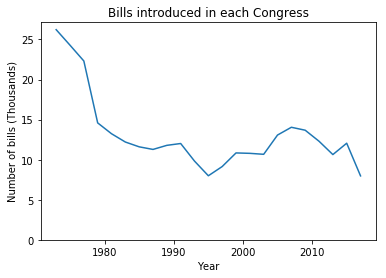

In [404]:
# To save the images we add a directory
directories = os.listdir(".")
# If "Images" is no present download
if ("Images" not in directories):
    # Make the directory "Images"
    os.mkdir("Images")

f, ax = plt.subplots(1)
ax.plot(billsPerCongress['Year'], billsPerCongress['count']/1000.0)
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('Number of bills (Thousands)')  # Add a label to the y-axis
plt.title('Bills introduced in each Congress')  # Add a plot title
ax.set_ylim(ymin=0)
plt.savefig('Images/BillsPerCongress.png')
plt.show(f)

This is slightly weird, especially the huge drop in bills introduced after the First 2 Congresses.

To invistigate I split the bills introduced by Type of Bills

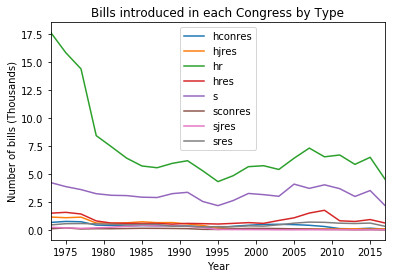

In [405]:
# Count Rows Grouped by Congress and Type (Using Beginning of year instead of Congress as it is more readable)
billsPerCongressType = pd.DataFrame({'count' : Bills.groupby( ['Year', 'Type'] ).size()}).reset_index()

#Dividing Count by 1000 as we want it as thousands
billsPerCongressType['count'] = billsPerCongressType['count']/1000.0

#Plotting the data
fig, ax = plt.subplots(1,1);
billsPerCongressType.groupby("Type").plot(x="Year", y="count", ax=ax)
plt.legend([v[0] for v in billsPerCongressType.groupby('Type')['Type']])
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('Number of bills (Thousands)')  # Add a label to the y-axis
plt.title('Bills introduced in each Congress by Type')  # Add a plot title
plt.savefig('Images/BillsPerCongressType.png')
plt.show()

This shows that there is a decrease in many different types, but especially in House Resolutions (HR). However this doesn't explain why this decrease happened. Therefore I will try to see if the number of bills introduced per congress changed only for one Subject or various different subjects between 93rd congress and 95th Congress.

Lets Calculate number of Bills per Congress and Per Subject.

In [406]:
# Count Rows Grouped by Congress and Subject
billsPerCongressSubject = pd.DataFrame({'count' : Bills.groupby( ['Congress', 'Subject'] ).size()}).reset_index()

Lets now Filter this down to only the 93rd Congress and 95th Congress in 2 separate tables

In [407]:
#Filtering by Congress and renaming the columns for a join
Bills93 = billsPerCongressSubject[billsPerCongressSubject['Congress']==93][['Subject','count']]
Bills93.columns = ['Subject','count93']
Bills95 = billsPerCongressSubject[billsPerCongressSubject['Congress']==95][['Subject','count']]
Bills95.columns = ['Subject','count95']

Now Lets Join the 2 data sets by Type and find which Types decreased by the most between the 93rd and 95th Congress, to guess if the decrease was due to a few subjects only.

In [408]:
#We join The 2 data sets for 93rd and 95th Congress 
#and replace those Subjects we found in one and not the Other as 0
BillsDifference = Bills93.merge(Bills95, left_on='Subject', right_on='Subject', how='outer')
BillsDifference.fillna(0,inplace = True)

#Calculate Which Subjects saw how much decrease in between the 2
BillsDifference['Decrease'] = BillsDifference['count93'] - BillsDifference['count95']


Now we look at the Top 10 Subjects with the highest decrease after sorting

In [409]:
# We now sort the data according this calculated ratio
BillsDifference.sort_values(by='Decrease', ascending=False, inplace=True)

print(BillsDifference[:10])

                                Subject  count93  count95  Decrease
920                      Social welfare   1047.0    468.0     579.0
159                      Commemorations    470.0      0.0     470.0
410  Government operations and politics    600.0    272.0     328.0
790                 Private legislation   1938.0   1623.0     315.0
479               International affairs    504.0    192.0     312.0
328                   Federal employees    471.0    175.0     296.0
422                              Health    293.0     26.0     267.0
34                 Agriculture and food    306.0     64.0     242.0
262                District of Columbia    233.0      0.0     233.0
68   Armed forces and national security    496.0    265.0     231.0


We can see that the decrease in bills were in various different subjects, indicating that the cause might be due to Functioning itself. After researching however I couldn't find the cause. Therefore for now I would assume this is true, but especially in 1977 after the previous 2 Congresses.

#### Hypothesis 2

Has the ratio of Bills enacted changed over the years?

For this we have to find the ratio of bills enacted over the years. Lets First count bills by type, result and congress

In [410]:
#Count How many bills of each type had what result
billsPerCongressResultType = pd.DataFrame({'countResult' : Bills.groupby( ['Year', 'Result', 'Type']
                                                                  ).size()}).reset_index()


Now we count how many of these bills were enacted and do a filtering. Then we merge the data with billsPerCongressType to calculate ratio of bills enacted. After merging we divide the count of bills enacted with toal bills.

In [411]:
BillsEnacted  = billsPerCongressResultType[billsPerCongressResultType['Result'] == 'Enacted']

# Recalculating Total Bills introduced per type
# Count Rows Grouped by Congress and Type (Using Beginning of year instead of Congress as it is more readable)
billsPerCongressType = pd.DataFrame({'count' : Bills.groupby( ['Year', 'Type'] ).size()}).reset_index()

#Merging with Total bills Count
EnactedRatio = BillsEnacted.merge(billsPerCongressType, left_on=['Year', 'Type'],
                                  right_on=['Year', 'Type'], how='outer')

# In case some year we didn't have data, filling NA with 0
EnactedRatio.fillna(0,inplace = True)

Calculate the Enacted Ratio by dividing the number of enacted bills by the total number of bills. Then we plot this chart.

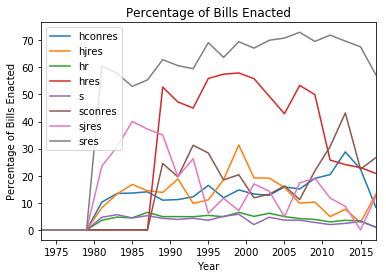

In [412]:
EnactedRatio['EnactedRatio'] = EnactedRatio['countResult'] * 100 / EnactedRatio['count']

#We are sorting first since that is needed for a graph
EnactedRatio.sort_values(by=['Year','Type'], ascending=True, inplace=True)

#Plotting the data
fig, ax = plt.subplots(1,1);
EnactedRatio.groupby("Type").plot(x="Year", y="EnactedRatio", ax=ax)
plt.legend([v[0] for v in EnactedRatio.groupby('Type')['Type']])
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('Percentage of Bills Enacted')  # Add a label to the y-axis
plt.title('Percentage of Bills Enacted')  # Add a plot title
plt.savefig('Images/SuccessPerCongressType.png')
plt.show()

There are 3 observations here.
1. It seems that different types of bills have a different probability of getting enacted. This does make sense as for a Simple Resolution (hres and sres) to pass they just need to be passed by 1 Chamber while for a normal bill to become Law, they need to be passed by both chambers and then get signed by the President. For the rest of my analysis I will only be focussing on Simple Bills i.e. HR and S introduced in the House of Representatives and Senate respectively
2. There is a data issue where HR and S bills have a 0% enctment before 1981 (97th Congress). I investigated and it seems that even if they were enacted, they are marked in the data set as Status="Referred". For example in the 93rd Congress HR510 was passed as seen here: https://www.congress.gov/bill/93rd-congress/house-bill/510 However in our data set it is marked as Referred. This indicates a possible issue with ProPublica data set. Therefore I am dropping all results before the 97th Congress in this Analysis
3. In the mos recent congress also there is a drop in Enctment Percentage. However this might be as some of these bills might get passed in the future. Therefore to ensure we don't accidentally reduce the number, I am also dropping the most recent Congress

In [413]:
# Filtering out Congresses we don't want
EnactedRatioFiltered = EnactedRatio[EnactedRatio['Year'] > 1979]
EnactedRatioFiltered = EnactedRatioFiltered[EnactedRatioFiltered['Year'] < 2017]

#Reducing to only HR and S Bills
#EnactedRatio = EnactedRatio[EnactedRatio['Type'] in ['hr', 's']]

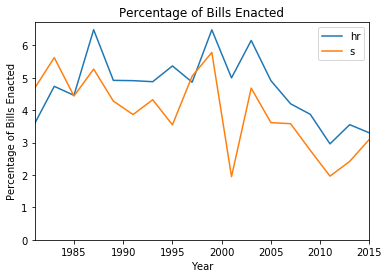

In [414]:
#We are sorting first since that is needed for a graph
EnactedRatioFiltered.sort_values(by=['Year','Type'], ascending=True, inplace=True)

EnactedRatioFiltered = EnactedRatioFiltered[(EnactedRatioFiltered['Type'] == 's')|
                                            (EnactedRatioFiltered['Type'] == 'hr')]

#Plotting the data
fig, ax = plt.subplots(1,1);
EnactedRatioFiltered.groupby("Type").plot(x="Year", y="EnactedRatio", ax=ax)
plt.legend([v[0] for v in EnactedRatioFiltered.groupby('Type')['Type']])
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('Percentage of Bills Enacted')  # Add a label to the y-axis
plt.title('Percentage of Bills Enacted')  # Add a plot title
ax.set_ylim(ymin=0)
plt.savefig('Images/BillsPerCongressTypeFiltered.png')
plt.show()



Here we can see that we do see a slight decline in bills being passed in 2007. 

### Hypothesis 3
Does having more cosponsors lead to a higher chance of the bill getting passed in the originating chamber.

Here I would like to point out that while earlier we were calculating the ratio of Bill getting enacted, now we are calculating chance of Getting Passed from the Originating Chamber. Therefore Bills that were not enacted but simply passed by the originating chamber are considered here as succesfully passed. In other words all bbills whose "Result" is not "Not Passed"

First we want to keep our analysis only to Simple Bills (HR and S). Also due to the data issue mentioned earlier, we will only consider Congresses between 1981 and 2016. 

In [415]:
#Filtering by year
Bills = Bills[Bills['Year'] > 1979]
Bills = Bills[Bills['Year'] < 2017]

#Filtering by Type
Bills = Bills[(Bills['Type'] == 's')| (Bills['Type'] == 'hr')]

As earlier descibed , we now find which bills passed the first house. 

In [416]:
Bills = Bills.assign(Passed = pd.Series(Bills["Result"] != "Not Passed").values)

Now Passed is a boolean variable which is only true if a bill passed the originating chamber.

Now I tried to classify how likely a bill is to pass based on some factprs. The first factor is number of cosponsors. For this I chose Logistic Regressionas not only is it a classifier but also gives the Probability of a bill being passed. 

Since number of members are different in both the House and the Senate, I will do the analysis separately.

First we import the Libraries required for doing Logistic Regression. For Logistic regression, I used http://blog.yhat.com/posts/logistic-regression-and-python.html to help me understand the code.

In [417]:
import statsmodels.api as sm
import numpy as np

Now lets create a Logistic Regression model. First we do this only for HR Bills in the House.

In [418]:
#Filtering by Type
hr = Bills[Bills['Type'] == "hr"]

#Only keeping the useful columns
hrData = hr[['CosponsorCount','Passed']]

hrData has 2 columns, the first is the count of CoSponsors. The Second is 0 if the bill did not pass in the originating Chamber, 1 if the bill did.

Now lets do a logistic regression. However Logistic regression requires an intercept. Therefore I am adding a variable intercept which is always equal to 1.

In [419]:
hrData = hrData.assign(Intercept = 1.0)

Now we build the model

In [420]:
#This builds the model and fits with data
logit = sm.Logit(hrData['Passed'], hrData[['Intercept','CosponsorCount']])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.325253
         Iterations 6


Lets print the result now of this now

In [421]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 Passed   No. Observations:               108284
Model:                          Logit   Df Residuals:                   108282
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                0.007604
Time:                        18:55:26   Log-Likelihood:                -35220.
converged:                       True   LL-Null:                       -35490.
                                        LLR p-value:                2.178e-119
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.2851      0.011   -204.874      0.000      -2.307      -2.263
CosponsorCount     0.0056      0.000     25.084      0.000       0.005       0.006


We can see from the smal p-value that the results are significant and the cosponsor count is significant. 
This indicates that indeed having more cosponsors increases the probablity of a bill getting passed. We can also visualize this.

Lets create a fake data which has Cosponsors equal to all values from 0 to 453 ( size of the House of Representatives)

In [422]:
#Cosponsors from 0 to 435
cosponsors = [k for k in range(0, 436)]
intercepts = [1.0 for k in range(0, 436)]

#Creating a data frame
hrDataTest = pd.DataFrame([intercepts, cosponsors]).T
hrDataTest.columns = ["Intercept", "CosponsorCount"]

Now lets use this data to redict the chance of Passing of a bill in the house given its cosponsor count.

In [423]:
#Using the model we trained above to predict
predictions = result.predict(hrDataTest)

Now lets plot cosponsor count with their predicted chance of passing.

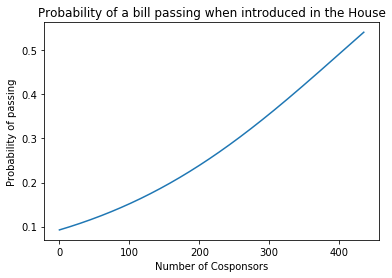

In [424]:
#Plotting the data
fig, ax = plt.subplots(1,1);
plt.plot(cosponsors,predictions)
plt.xlabel('Number of Cosponsors')  # Add a label to the x-axis
plt.ylabel('Probability of passing')  # Add a label to the y-axis
plt.title('Probability of a bill passing when introduced in the House')  # Add a plot title
plt.savefig('Images/ProbHouse.png')
plt.show()

We can see how as we increase the number of cosponsors, the chances of a bill passing increases a lot

Now lets do the same for the Senate

In [425]:
#Filtering by Type
s = Bills[Bills['Type'] == "s"]

#Only keeping the useful columns
sData = s[['CosponsorCount','Passed']]

Adding an intercept and building the model to show the result

In [426]:
#hrData[:,'intercept'] = 1.0
sData = sData.assign(Intercept = 1.0)

#This builds the model and fits with data
logit = sm.Logit(sData['Passed'], sData[['Intercept','CosponsorCount']])
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.286669
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Passed   No. Observations:                57890
Model:                          Logit   Df Residuals:                    57888
Method:                           MLE   Df Model:                            1
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                0.009120
Time:                        18:56:08   Log-Likelihood:                -16595.
converged:                       True   LL-Null:                       -16748.
                                        LLR p-value:                 2.091e-68
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5132      0.017   -147.729      0.000      -2.547      -2.480
CosponsorCount   

Once again we see that Cosponsor Count is positive and extremely significant (p-value is much less than 0.05). Therefore we can see that having more co sponsors helps a lot in the senate as well. We also observe that the coefficient is higher here. This makes sense as the Senate has only 100 members and therefore each cosponsorship carries more weight. 

Not lets see this graphically as well similar to above.

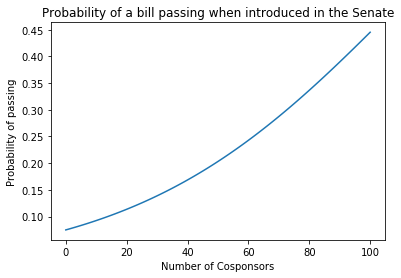

In [427]:
#Cosponsors from 0 to 435
cosponsors = [k for k in range(0, 101)]
intercepts = [1.0 for k in range(0, 101)]

#Creating a data frame
sDataTest = pd.DataFrame([intercepts, cosponsors]).T
sDataTest.columns = ["Intercept", "CosponsorCount"]

#Using the model we trained above to predict
predictions = result.predict(sDataTest)

#Plotting the data
fig, ax = plt.subplots(1,1);
plt.plot(cosponsors,predictions)
plt.xlabel('Number of Cosponsors')  # Add a label to the x-axis
plt.ylabel('Probability of passing')  # Add a label to the y-axis
plt.title('Probability of a bill passing when introduced in the Senate')  # Add a plot title
plt.savefig('Images/ProbSenate.png')
plt.show()

Therefore we can confidently say that our third hypothesis that having more cosponsor helps a bill.

### Hypothesis 4

Are bills more likely to pass if introduced by someone whose party has the majority in that chamber. Also are bills sponsored by minority members getting passed at a lower rate?

We first need to create a boolean variable which will tell us if the sponsor of the bill belongs to the majority party The function returns true if for a member there party has more members than the other party In case of a Senate tie, I break the Tie by giving it to party which controls the presidency and therefore the vice presidency (true between 1973 and 2017). For this we write the following function:

In [428]:
def isMajorityParty(sponsor, chamber,
                   houseDemocrats, houseRepublicans,
                   senateDemocrats, senateRepublicans, presidency):
    """
    The function returns true if for a member there party has more members than the other party
    In case of a Senate tie, I break the Tie by giving it to party which controls the presidency
    and therefore the vice presidency (true between 1973 and 2017)
    """
    #House
    if(chamber == 'House'):
        if(sponsor == 'Democrat'):
            return (houseDemocrats > houseRepublicans)
        else:
            return (houseDemocrats < houseRepublicans)
    #Senate
    else:
        if(senateDemocrats == senateRepublicans):
            return (sponsor == presidency) # In case of a tie we say the president party has senate majority
        elif(sponsor == 'Democrat'):
            return (senateDemocrats > senateRepublicans)
        else:
            return (senateDemocrats < senateRepublicans)


However we can only do this for bills whose sponsor is a member of either the Democrat or the Republican. There we filter by this.

In [429]:
#Filtering out all bills whose sponsors are either not defined
#Or not a member of the 2 main parties
Bills = Bills[(Bills['SponsorParty'] == 'Democrat')| (Bills['SponsorParty'] == 'Republican')]

Now we create the new variable which will indicate if the member is majority member or not

In [430]:
sponsorMajority = []
#Looping over each row to find the value
for index, row in Bills.iterrows():
    sponsorMajority.append(isMajorityParty(row['SponsorParty'], row['Chamber'],
                   row['DemocratHouse'], row['RepublicanHouse'],
                   row['DemocratSenate'], row['RepublicanSenate'], row['Presidency']))

Adding this value to our table

In [431]:
Bills = Bills.assign(SponsorFromMajority = pd.Series(sponsorMajority).values)

First lets analyse House bills and Senate Bills Seprately

In [432]:
HRBills = Bills[Bills['Type'] == 'hr']
SBills = Bills[Bills['Type'] == 's']

Now lets count number of bills introduced by majority members and minority members over the years and whether that has changed. This will be Group by count operation. Lets begin with House Bills.

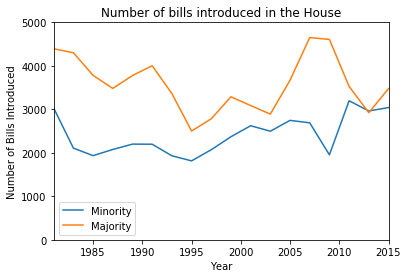

In [433]:
# Count Rows Grouped by Congress and Type (Using Beginning of year instead of Congress as it is more readable)
billsPerCongressMajorityType = pd.DataFrame({'count' : HRBills.groupby( ['Year', 'SponsorFromMajority',
                                                                       'Type'] ).size()}).reset_index()

#Plotting the data
fig, ax = plt.subplots(1,1);
billsPerCongressMajorityType.groupby("SponsorFromMajority").plot(x="Year", y="count", ax=ax)
#plt.legend([v[0] for v in billsPerCongressMajorityType.groupby('SponsorFromMajority')['SponsorFromMajority']])
plt.legend(["Minority", "Majority"])
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('Number of Bills Introduced')  # Add a label to the y-axis
#plt.title('Number of bills introduced by Members of the Majority and Minority Party in the House')  # Add a plot title
plt.title('Number of bills introduced in the House') 
ax.set_ylim(ymin=0, ymax = 5000)
plt.savefig('Images/BillsFromMemberHouse.png')
plt.show()

Doing the same for the Senate

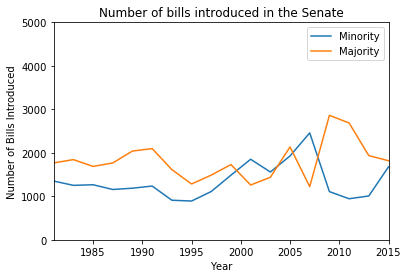

In [434]:
# Count Rows Grouped by Congress and Type (Using Beginning of year instead of Congress as it is more readable)
billsPerCongressMajorityType = pd.DataFrame({'count' : SBills.groupby( ['Year', 'SponsorFromMajority',
                                                                       'Type'] ).size()}).reset_index()

#Plotting the data
fig, ax = plt.subplots(1,1);
billsPerCongressMajorityType.groupby("SponsorFromMajority").plot(x="Year", y="count", ax=ax)
#plt.legend([v[0] for v in billsPerCongressMajorityType.groupby('SponsorFromMajority')['SponsorFromMajority']])
plt.legend(["Minority", "Majority"])
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('Number of Bills Introduced')  # Add a label to the y-axis
#plt.title('Number of bills introduced by Members of the Majority and Minority Party in the Senate')  # Add a plot title
plt.title('Number of bills introduced in the Senate')
ax.set_ylim(ymin=0, ymax = 5000)
plt.savefig('Images/BillsPerMemberSenate.png')
plt.show()

Its interesting to note that while in the house we see that members of the majority introduce way more bills the same is not true in the senate.

Lets now get how much percent of these bills get passed in their originating chamber.

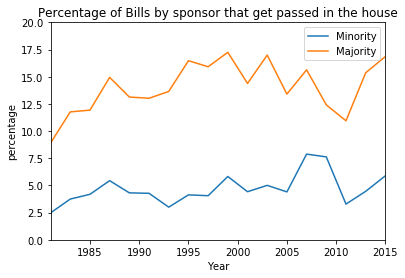

In [435]:
# Count Rows Grouped by Congress and Type (Using Beginning of year instead of Congress as it is more readable)
billsPerCongressMajorityType = pd.DataFrame({'mean' : HRBills.groupby( ['Year', 'SponsorFromMajority',
                                                                       'Type'] )['Passed'].mean()}).reset_index()
billsPerCongressMajorityType['mean'] = billsPerCongressMajorityType['mean']*100
#Plotting the data
fig, ax = plt.subplots(1,1);
billsPerCongressMajorityType.groupby("SponsorFromMajority").plot(x="Year", y="mean", ax=ax)
#plt.legend([v[0] for v in billsPerCongressMajorityType.groupby('SponsorFromMajority')['SponsorFromMajority']])
plt.legend(["Minority", "Majority"])
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('percentage')  # Add a label to the y-axis
plt.title('Percentage of Bills by sponsor that get passed in the house')  # Add a plot title
ax.set_ylim(ymin=0, ymax = 20)
plt.savefig('Images/PassPerMemberHouse.png')
plt.show()

The same for the Senate

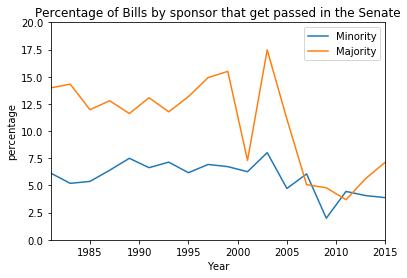

In [436]:
# Count Rows Grouped by Congress and Type (Using Beginning of year instead of Congress as it is more readable)
billsPerCongressMajorityType = pd.DataFrame({'mean' : SBills.groupby( ['Year', 'SponsorFromMajority',
                                                                       'Type'] )['Passed'].mean()}).reset_index()
billsPerCongressMajorityType['mean'] = billsPerCongressMajorityType['mean']*100
#Plotting the data
fig, ax = plt.subplots(1,1);
billsPerCongressMajorityType.groupby("SponsorFromMajority").plot(x="Year", y="mean", ax=ax)
#plt.legend([v[0] for v in billsPerCongressMajorityType.groupby('SponsorFromMajority')['SponsorFromMajority']])
plt.legend(["Minority", "Majority"])
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('percentage')  # Add a label to the y-axis
plt.title('Percentage of Bills by sponsor that get passed in the Senate')  # Add a plot title
ax.set_ylim(ymin=0, ymax = 20)
plt.savefig('Images/PassPerMemberSenate.png')
plt.show()

Here I observe that once again in the House Bills with a sponsor who is a member of the majority party are much more likely to be passed. However The same is not true for the Senate especially in recent years. This could be due to the Filibuster in Congress which requires for a party to control only 41 members to block the vote on certain bills.

The one dip in 2001 is due to a byelection which led to a situation where although the senate started out as as a 50-50 split, with the Vice President, Dick Cheney breaking the tie in the Republican's favour. However over the 2 years, the senate actually became a 49 -49 split between the 2 largest parties with 2 independents. Therefore techincally no party had a majority, a fact which my code didn't account for.

However this doesn' explain the drop in pass percentage from 2009 onwards as those Senates had one party in control.

### Hypothesis 5 : Does bipartisanship affect a bill's chances of success

Finally I would like to see if a bill being partisan increases its chances of success. I define the bipartisanity of a bill as the suppport of cosponsors of the party different to that of sponsors.

Therefore I built a linear regression model that predicts the probability of a bill's success based on the following factors:
1. Fellow Cosponsors: Numer of sponsor from the same party as the sponsor
2. Opposition Cosponsors: Number of cosponsors from the opposite party as the sponsor
3. Fellow Members: Members of the originating chamber of the same party as the sponsor

The first 2 factors contribute to the bipartisanship

The last one is indicator of the sponsor's party being a majority or not. Instead of a boolean variable, by keeping the actual count it also includes the size of majority. 

I have not included opposition members of the congress as that number is very strongly correlated with the size of fellow members in a negative manner.

We begin by defining functions that calculate these 3 values, similar to how we calculated if the sponsors party has the majority.

In [437]:
def getFellowMember(sponsor, chamber,
                   houseDemocrats, houseRepublicans,
                   senateDemocrats, senateRepublicans):
    """
    The function returns number of members of the chamber of the same political party as the lead sponsor
    """
    #House
    if chamber == 'House':
        if sponsor == 'Democrat':
            return houseDemocrats
        else:
            return houseRepublicans
    #Senate
    else:
        if sponsor == 'Democrat':
            return senateDemocrats
        else:
            return  senateRepublicans

def getFellowSponsor(sponsorParty, DemocratCosponsorCount, RepublicansCosponsorCount):
    """
    The function returns number of cosponser of the same political party as the lead sponsor
    """
    if sponsorParty == 'Democrat':
        return DemocratCosponsorCount
    else:
        return RepublicansCosponsorCount

def getOppositeSponsor(sponsorParty, DemocratCosponsorCount, RepublicansCosponsorCount):
    """
    The function returns number of cosponser of the different political party as the lead sponsor
    """
    if(sponsorParty == 'Republican'):
        return DemocratCosponsorCount
    else:
        return RepublicansCosponsorCount

Now we calculate this value for all the rows in Bills. Note: Already this only includes data for which we have a sponsor from one of the 2 main parties.

In [438]:
fellowMember, fellowSponsor, oppositeSponsor = [], [], []
#Looping over each row to find the value
for index, row in Bills.iterrows():
    fellowMember.append(getFellowMember(row['SponsorParty'], row['Chamber'],
                   row['DemocratHouse'], row['RepublicanHouse'],
                   row['DemocratSenate'], row['RepublicanSenate']))
    fellowSponsor.append(getFellowSponsor(row['SponsorParty'],row['DemocratCoSponsers'],row['RepublicanCoSponsers']))
    oppositeSponsor.append(getOppositeSponsor(row['SponsorParty'],row['DemocratCoSponsers'],row['RepublicanCoSponsers']))
    

Adding these values to our table

In [439]:
Bills = Bills.assign(FellowMember = pd.Series(fellowMember).values)
Bills = Bills.assign(FellowSponsor = pd.Series(fellowSponsor).values)
Bills = Bills.assign(oppositeSponsor = pd.Series(oppositeSponsor).values)

Once again we split our data inot the House and Senate separately.

In [440]:
HRBills = Bills[Bills['Type'] == 'hr']
SBills = Bills[Bills['Type'] == 's']

Applying Logistic regression to only house bills like earlier

In [441]:
#Only keeping the useful columns
hrData = HRBills[['FellowMember','FellowSponsor','oppositeSponsor','Passed']]

#Adding the intercept
hrData = hrData.assign(Intercept = 1.0)

#Building the logistic regression model
#This builds the model and fits with data
logit = sm.Logit(hrData['Passed'], hrData[['Intercept','FellowMember','FellowSponsor','oppositeSponsor']])
result = logit.fit()

#print results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.318088
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Passed   No. Observations:               107947
Model:                          Logit   Df Residuals:                   107943
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                 0.03055
Time:                        18:57:00   Log-Likelihood:                -34337.
converged:                       True   LL-Null:                       -35419.
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.5060      0.087    -63.260      0.000      -5.677      -5.335
FellowMember  

Here we clearly observe that while all 3 variables are significant, oppositeSponsor has a higher coefficient than FellowSponsor. This indicates that getting a cosponsor from a party different from your to cosponsor your bill increrases the chances of passing much more than getting someone from the same party as the the sponsor.

Doing the same for Senate:

In [442]:
#Only keeping the useful columns
sData = SBills[['FellowMember','FellowSponsor','oppositeSponsor','Passed']]

#Adding the intercept
sData = sData.assign(Intercept = 1.0)

#Building the logistic regression model
#This builds the model and fits with data
logit = sm.Logit(sData['Passed'], sData[['Intercept','FellowMember','FellowSponsor','oppositeSponsor']])
result = logit.fit()

#print results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.281557
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Passed   No. Observations:                57058
Model:                          Logit   Df Residuals:                    57054
Method:                           MLE   Df Model:                            3
Date:                Sat, 09 Dec 2017   Pseudo R-squ.:                 0.02836
Time:                        18:57:00   Log-Likelihood:                -16065.
converged:                       True   LL-Null:                       -16534.
                                        LLR p-value:                5.687e-203
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -6.1078      0.183    -33.422      0.000      -6.466      -5.750
FellowMember  

We see that while number of members of the party in the chamber still has a high coeffcient, the number of cosponsosrs from the same party as the sponsor has significant negative coeffcient (although very slight). However number of sponsors from the opposite party carries a large significant positive coefficient. This is explainable as it shows that in the Senate in particular, having bipartisan support for a bill really helps its chances. The slight negative coefficient for cosponsors of the same party is due to the fact that if a bill has only support from one party and not the other its unlikely to pass. Therefore while bills that pass get support from both sides of the aisle, those that don't pass often get support only from one side, thereby making that coefficient negative.

From this we can conclude that in the House and the Senate, bipartisan support definitely helps a bill in passing.

### Hypothesis 6: Is bipartisanship decreasing in the Congress

Lets define a way to define a bill is bipartisan. I propose that a bill should have at least some support for a bill to be considered bipartisan. Therefore I define the following 2 criteria:

1. Supported: A bill is well supported if it has 20 cosponsors in the House of Representatives or 10 in the Senate.
2. BiPartisan: A bill is bipartisan if at least 20% of the cosponsors are from each othe 2 parties. 

Lets define these 2 functions

In [443]:
def isBiPartisan(DC, RC, chamber):
    """
    This returns true if a bill is bipartisan
    """
    if chamber == 'House':
        l = 20
    else:
        l = 10
    if (((DC + RC) >= l) and (DC >= (RC/4.0)) and (RC >= (DC/4.0))):
        return True;
    else:
        return False;
        
def isSupported(DC, RC, chamber):
    """
    This returns true if a bill is well supported
    """
    if chamber == 'House':
        l = 20
    else:
        l = 10
    if ((DC + RC) >= l):
        return True;
    else:
        return False;

We now calculate these values for all rows/bills.

In [444]:
supported, bipartisan = [], []
#Looping over each row to find the value
for index, row in Bills.iterrows():
    supported.append(isSupported(row['DemocratCoSponsers'],row['RepublicanCoSponsers'],row['Chamber']))
    bipartisan.append(isBiPartisan(row['DemocratCoSponsers'],row['RepublicanCoSponsers'],row['Chamber']))
    

In [445]:
Bills = Bills.assign(sup = pd.Series(sup).values)
Bills = Bills.assign(bip = pd.Series(bip).values)

We now need to calculate how many of the supported bills are bipartisan. So we filter down to well supported bills only.

In [446]:
BillsSupported = Bills[Bills['sup']==True]

Now we count what is the ratio of well supported bills that are bipartisan.

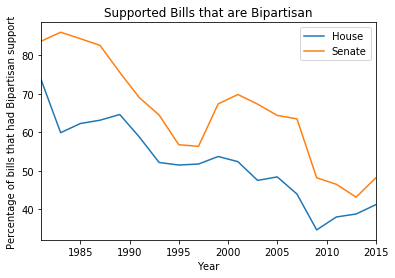

In [449]:
# Count Rows Grouped by Congress and Type (Using Beginning of year instead of Congress as it is more readable)
billsPerpartisanship = pd.DataFrame({'mean' : BillsSupported.groupby( ['Year', "Chamber"] )['bip'].mean()}).reset_index()

# Multiplying by 100 as we want to calculate percentage
billsPerpartisanship['mean'] = billsPerpartisanship['mean']*100

#Plotting the data
fig, ax = plt.subplots(1,1);
billsPerpartisanship.groupby("Chamber").plot(x="Year", y="mean", ax=ax)
plt.legend([v[0] for v in billsPerpartisanship.groupby('Chamber')['Chamber']])
#plt.legend(["Minority", "Majority"])
plt.xlabel('Year')  # Add a label to the x-axis
plt.ylabel('Percentage of bills that had Bipartisan support')  # Add a label to the y-axis
plt.title('Supported Bills that are Bipartisan')  # Add a plot title
#ax.set_ylim(ymin=0, ymax = 20)
plt.savefig('Images/Bipartisan.png')
plt.show()

From here we can observe that indeed bipartisan support has decreased a lot over the ages and could be a cause of what prevents bills from passing and slight recent decrease in amount of bills that can get enacted as laws.

# Conclusion

We concluded that the number of bills introduced in congress each year has mostly remained same after 1977 onwards. However the ratio of bills that become enacted has decreased a bit over the last few years.

From our analysis, we can see that indeed having more cosponsors increases the chances of a bill passing congress and becoming law. Also while having cosponsors from one party is slightly helpful, having bipartisan support from both sides of a party helps the bill's chances a lot more.

However we also showed that unfortunately, bipartisanship has been decreasing in congress a lot over the years, possibly explaining the recent decrease in the number of bills that get passed, giving an impression of gridlock in the congress.

# Issues

These are the possible issues with my analysis:

1. Not all bills are equal. In my analysis I am treating bills as equal to each other. However a bill like healthcare is obviously much more important than another that just changes the name of a park. Therefore that should be factored in.
2. For counting the number of members of a political party, I used the count from the beginning of the congress. However some members might have resigned over the 2 years and this changed the numbers. This could have led to situations like 2001-2002 Senate as mentioned above which went from a tie break republican majority to a 49-49-2 split where neither party had a majority.
3. The relationship between a bill's passing probability and cosponsors is probably not linear in a logistic manner. However as we just seeing the coefficient, that should be fine.
4. The analysis doesn't imply that passing more bills is good for congress. Some could say that increased bipartisanship might lead to a decrease in opposition or decrease in debate. Therefore this should simply be seen as a statistical analysis that leads to future research

# Future work
The data about bills introduced in congress is a treasure trove. Some of the possible future research that we can do:
1. Do different committees have different procedures and if so does that lead to difference is probability of success of the bill?
2. How likely is it for women to Sponsor/ Cosponsor bills? Do these bills have a similar chance of success? This is especially important considering the low proportion of women in the Congress both currently and historically. The US GitHub does contain data for gender for the Legislators. 
3. Using the Wikipedia data for each Legislator, provided in US GitHub account, we could try obtaining more information and see how that affects their bills. For example, are legislators elected with a larger majority more likely to introduce more bills?


# License
My research would be released under an MIT License and the data is all public domain.


# Tools and Libraries Used

The analysis was done using python version 3.5.3

I used the following libraries:
1. os
2. json
3. numpy
4. pandas
5. zipfile
6. urlib
7. matplotlib
8. statsmodels
